In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Esercizio 1**

In [ ]:
import pandas as pd 
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ai/breast-cancer-wisconsin.txt", names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"])

In [ ]:
df1

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
df1[df1['Sample code number']== 1369821]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
680,1369821,10,10,10,10,5,10,10,10,7,4


In [ ]:
df = df1.drop("Sample code number",axis=1)

In [ ]:
df["Class"].unique()

array([2, 4])

In [ ]:
df = df.drop(df[df['Bare Nuclei'].isin(['?'])].index)

In [ ]:
import numpy as np
df = df.to_numpy()
x=df[:,:-1]
y=df[:,-1]
y=y.astype('int')

import collections
collections.Counter(y)

Counter({2: 444, 4: 239})

In [ ]:
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[5 1 1 1 2 '1' 3 1 1]
 [5 4 4 5 7 '10' 3 2 1]
 [3 1 1 1 2 '2' 3 1 1]
 [6 8 8 1 3 '4' 3 7 1]
 [4 1 1 3 2 '1' 3 1 1]
 [8 10 10 8 7 '10' 9 7 1]
 [1 1 1 1 2 '10' 3 1 1]
 [2 1 2 1 2 '1' 3 1 1]
 [2 1 1 1 2 '1' 1 1 5]
 [4 2 1 1 2 '1' 2 1 1]]
y = [2 2 2 2 2 4 2 2 2 2]


In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30,
                                                    stratify = y, 
                                                    random_state = 123) 

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((478, 9), (478,), (205, 9), (205,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)
print(f'dati predetti dal metodo =                {predict[:10]}') 
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') 

dati predetti dal metodo =                [4 2 2 4 4 2 2 4 4 2]
dati reali presenti nel dataset di test = [4 2 2 4 4 2 2 4 4 2]


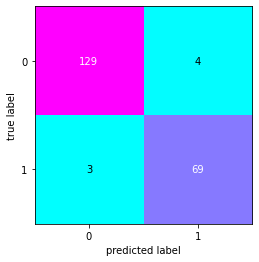

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.cool)
plt.show()

Maximum accuracy:- 0.975609756097561 at K = 4


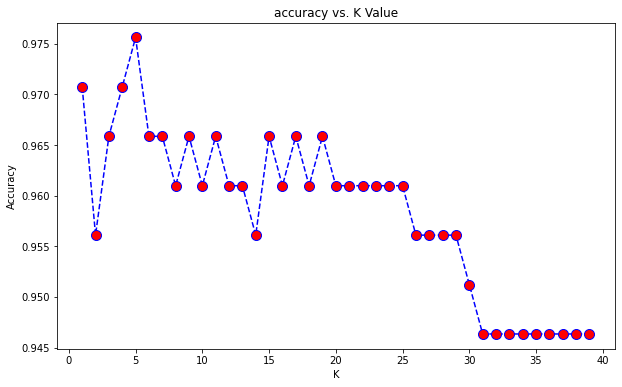

In [ ]:
acc = []
from sklearn import metrics
for k in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
from tabulate import tabulate

info = [ "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses"]
test= [10,10,10,10,5,10,10,10,7] # valore delle misurazioni
print(tabulate([test], headers=info))

  Clump Thickness    Uniformity of Cell Size    Uniformity of Cell Shape    Marginal Adhesion    Single Epithelial Cell Size    Bare Nuclei    Bland Chromatin    Normal Nucleoli    Mitoses
-----------------  -------------------------  --------------------------  -------------------  -----------------------------  -------------  -----------------  -----------------  ---------
               10                         10                          10                   10                              5             10                 10                 10          7


In [ ]:
predicttest = neigh.predict([test])
predicttest

array([4])

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=2, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict_dt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict_dt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [2 4 2 4 4 2 2 4 4 2]
dati reali presenti nel dataset di test = [4 2 2 4 4 2 2 4 4 2]


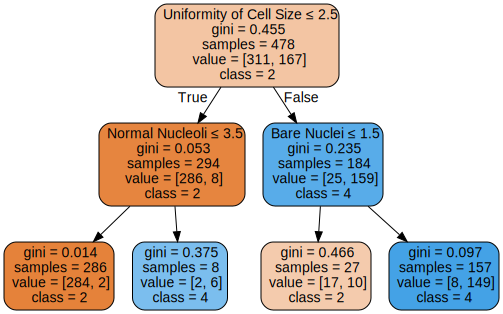

In [ ]:
df = df1.drop("Sample code number",axis=1)
df = df.drop(df[df['Bare Nuclei'].isin(['?'])].index)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[:-1],  
                     class_names=['2', '4'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('Breast Cancer')
graph

Maximum accuracy:- 0.9219512195121952 at K = 2


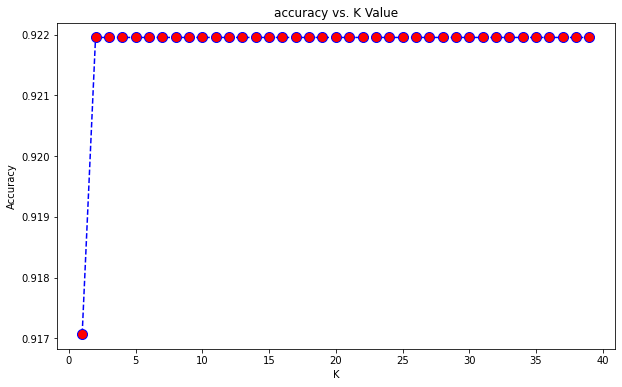

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
  tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=i, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )
  # prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
  tree_clf.fit(X_train,y_train)

  # seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
  predict_dt = tree_clf.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, predict_dt))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)) + 1 )

In [ ]:
predicttest = tree_clf.predict([test])
predicttest

array([4])

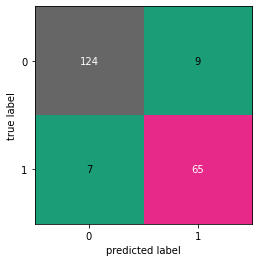

In [ ]:
#Metodo Tree
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict_dt), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           2       0.95      0.93      0.94       133
           4       0.88      0.90      0.89        72

    accuracy                           0.92       205
   macro avg       0.91      0.92      0.91       205
weighted avg       0.92      0.92      0.92       205



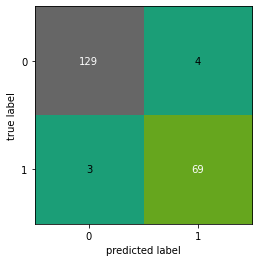

In [ ]:
#Metodo KNN 
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           2       0.98      0.97      0.97       133
           4       0.95      0.96      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



Possiamo notare una precisione maggiore usando il metodo KNN

In [ ]:
print(tabulate([test], headers=info))

  Clump Thickness    Uniformity of Cell Size    Uniformity of Cell Shape    Marginal Adhesion    Single Epithelial Cell Size    Bare Nuclei    Bland Chromatin    Normal Nucleoli    Mitoses
-----------------  -------------------------  --------------------------  -------------------  -----------------------------  -------------  -----------------  -----------------  ---------
               10                         10                          10                   10                              5             10                 10                 10          7


In [ ]:
df.loc[680]

Clump Thickness                10
Uniformity of Cell Size        10
Uniformity of Cell Shape       10
Marginal Adhesion              10
Single Epithelial Cell Size     5
Bare Nuclei                    10
Bland Chromatin                10
Normal Nucleoli                10
Mitoses                         7
Class                           4
Name: 680, dtype: object

hanno classificato correttamente

In [ ]:
X_test[(X_test[:,0] == 10) & (X_test[:,1] == 10) & (X_test[:,2] == 10) & (X_test[:,3] == 10) & (X_test[:,4] == 5) & (X_test[:,5] == 10) & (X_test[:,6] == 10) & (X_test[:,7] == 10) & (X_test[:,8] == 7)]

array([], shape=(0, 9), dtype=object)

In [ ]:
X_train[(X_train[:,0] == 10) & (X_train[:,1] == 10) & (X_train[:,2] == 10) & (X_train[:,3] == 10) & (X_train[:,4] == 5) & (X_train[:,5] == 10) & (X_train[:,6] == 10) & (X_train[:,7] == 10) & (X_train[:,8] == 7)]

array([], shape=(0, 9), dtype=object)

**Esercizio 2**

In [ ]:
import pandas as pd 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/glass.data', names=['1', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'])
df

FileNotFoundError: ignored

In [ ]:
df = df.drop('1', axis=1)
df

In [ ]:
df=df.dropna().reset_index(drop=True)
df

In [ ]:
import numpy as np
df_np = df.to_numpy()
x=df_np[:,:-1]
y=df_np[:,-1]

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

In [ ]:
import collections
collections.Counter(y)

In [ ]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

# inizializziamo il metodo con n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=5)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predictknn = neigh.predict(X_test)

print(f'dati predetti dal metodo =                {predictknn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

In [ ]:
!pip install mlxtend

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predictknn), cmap=plt.cm.cool)
plt.show()

In [ ]:
print(classification_report(y_test, predictknn))

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for k in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)) + 1 )

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

# inizializziamo il metodo con n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=3)

# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

# proviamo a fare una previsione sui dati del test set
predictknn = neigh.predict(X_test)

print(f'dati predetti dal metodo =                {predictknn[:10]}')
print(f'dati reali presenti nel dataset di test = {y_test[:10]}')

In [ ]:
# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predictknn), cmap=plt.cm.cool)
plt.show()

In [ ]:
print(classification_report(y_test, predictknn))

In [ ]:
daScoprire = [[1.51115, 17.38, 0.00, 0.34, 75.41, 0.00, 6.65, 0.00, 0.00]]
predictdaScoprire = neigh.predict(daScoprire)
predictdaScoprire

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predictdt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predictdt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predictdt), cmap=plt.cm.cool)
plt.show()

In [ ]:
print(classification_report(y_test, predictdt))

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
  tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=i, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )
  # prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
  tree_clf.fit(X_train,y_train)

  # seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
  predictdt = tree_clf.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, predictdt))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at max_depth =",acc.index(max(acc)) + 1 )

In [ ]:
# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predictdt = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predictdt[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predictdt), cmap=plt.cm.cool)
plt.show()

In [ ]:
print(classification_report(y_test, predictdt))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/glass.data', names=['1', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'])
df = df.drop('1', axis=1)
df=df.dropna().reset_index(drop=True)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:9],  
                     class_names=['0', '1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('Glass')
graph

**Esercizio 3**